## Decision Tree and Random Forest classifier

The goal of this project is to build a classifier based on machine learning algorithms (DT and RFC), which will detect fake Swiss banknotes based on their size characteristics.

Data sample - 200 banknotes samples (data from Flury and Riedwyl (1988))

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# modules for classification
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier as RFC

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from pydot import graph_from_dot_data

## 1. Decision trees

### 1.1 Prepare the data

In [4]:
# load the dataset
swiss = pd.read_excel("SwissBankNotes.xlsx", sheet_name = "data")
swiss.head()

,length,h_l,h_r,dist_l,dist_up,diag,origin
0,214.8,131.0,131.1,9.0,9.7,141.0,1
1,214.6,129.7,129.7,8.1,9.5,141.7,1
2,214.8,129.7,129.7,8.7,9.6,142.2,1
3,214.8,129.7,129.6,7.5,10.4,142.0,1
4,215.0,129.6,129.7,10.4,7.7,141.8,1


In [5]:
# separate the features and the outcome variable
swissX = swiss.drop('origin', axis=1)
swissY = swiss['origin']

### 1.2 Construct a Decition Tree

In [6]:
# define and fit the DT-classifier
clfr_DT = DTC(criterion='gini', max_depth=1, random_state=None).fit(swissX, swissY)

# make a 'naive' prediction
swissYpred = clfr_DT.predict(swissX)
print(confusion_matrix(y_true=swissY, y_pred=swissYpred))
print(classification_report(y_true=swissY, y_pred=swissYpred))

[[100   0]
 [  2  98]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       100
           1       1.00      0.98      0.99       100

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



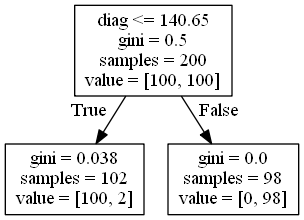

In [7]:
# construct a graph of the DT
dot_data = StringIO()
export_graphviz(clfr_DT, out_file=dot_data, feature_names=swissX.columns)
(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 1.3 Cross-validation (by proportional random subsampling)

In [8]:
# make a container for accuracies
iterations = 10000
swiss_acc_test = []

for i in range(iterations):

    # make sub-samples
    X_train, X_test, y_train, y_test = train_test_split(swissX, swissY, test_size = 0.2, random_state=i)
    
    # estimate a DT
    clfr_DT_XV = DTC(criterion='gini', max_depth=None, random_state=None).fit(X_train, y_train)
    y_test_pred_XV = clfr_DT_XV.predict(X_test)
    
    # calculate accuracy and store it
    swiss_acc_test.append(clfr_DT_XV.score(X_test, y_test))

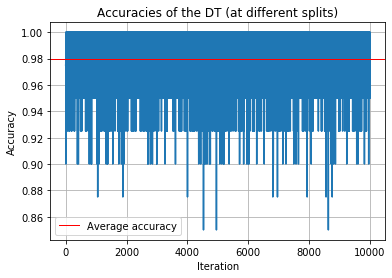

In [9]:
# construct a graph of accuracies
plt.plot(swiss_acc_test)
plt.xlabel("Iteration")
plt.ylabel("Accuracy")
plt.title("Accuracies of the DT (at different splits)")
plt.grid()
plt.axhline(y=np.mean(swiss_acc_test), color='red', linewidth=1, label='Average accuracy')
plt.legend()
plt.show()


## 2. Random Forest

### 2.1 Prepare the data

In [10]:
# read the training and the test samples
X_train, X_test, y_train, y_test = train_test_split(swissX, swissY, test_size = 0.2, random_state=i)

In [11]:
X_train.shape
y_train.head()

106    0
0      1
188    0
128    0
44     1
Name: origin, dtype: int64

In [12]:
X_train.columns

Index(['length', 'h_l', 'h_r', 'dist_l', 'dist_up', 'diag'], dtype='object')

### 2.2 Construct and test a Random Forest

In [13]:
# define an RF-classifier
clfr_RF = RFC(n_estimators=100)

# estimating the model
clfr_RF.fit(X_train, y_train.values.ravel())

# checking performance of the RF-model
y_pred_RF= clfr_RF.predict(X_test)
print(classification_report(y_true=y_test, y_pred=y_pred_RF))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        24

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



As a result, Random Forest classifier performed much better on this dataset, having absolute predictions of fake banknotes based on their size.